<a href="https://colab.research.google.com/github/Juliodominguezcalderon/Talento_tech/blob/main/An%C3%A1lisis_de_sentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Instalar la biblioteca de google translator
!pip install googletrans==4.0.0-rc1 # Installing latest version

In [3]:
#Importamos la librería pandas para el analisis de datos
import pandas as pd
# importamos la clase textblob desde la biblioteca TextBlob la cual permite realizar procesamiento de lenguaje natural (NLP) para realizar análisis de sentimientos, traducciones entre otros
from textblob import TextBlob
# Permite acceder al API de tranducción de Google
from googletrans import Translator

In [28]:
#Esta función toma el texto español como entrada y devuelve la traducción de ese comentario en inglés
def translateComment(strComment:str):
    translator = Translator()
    strEngComment = translator.translate(strComment, src="es", dest="en") # Traducción del comentario de español (es) a ingles (en)
    return strEngComment.text

La siguiente subrutina realiza las siguientesa acciones:
1. Traduce el comentario al inglés usando la función translateComment.
2. Crea un objeto TextBlob con el comentario traducido.
3. Devuelve la polaridad del sentimiento del comentario traducido.

La instrucción - analysis.sentiment.polarity- devuelve un valor de polaridad que indica el sentimiento del comentario. La polaridad es un valor numérico que varía entre -1.0 y 1.0:
-1.0 indica un sentimiento totalmente negativo.
0 indica un sentimiento neutral.
1.0 indica un sentimiento totalmente positivo.

In [29]:
def getPolarity(strComment:str):
    strComment = translateComment(strComment)
    analysis = TextBlob(strComment)
    return analysis.sentiment.polarity

In [11]:
# Se carga el dataset y se le adiciona la columna polaridad para obtener el sentimiento de cada comentario
df = pd.read_csv('/content/Comentarios.csv')
df['polaridad'] = df['Comentario'].apply(getPolarity)


In [30]:
#Guardamos el data frame y visualizamos sus datos
df.to_csv('resultados.csv', index=False)
df = pd.read_csv('/content/resultados.csv')
display(df)

,Comentario,polaridad
0,La comida fue excelente y el servicio fue exce...,0.333333
1,El ambiente era agradable y la comida estaba d...,0.261458
2,"La comida estaba bien, pero el servicio fue le...",-0.012393
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000
4,El peor restaurante en el que he estado. No lo...,-1.000000
...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167
67,"Buen lugar para cenar, aunque el servicio pued...",0.200000
68,"La comida está bien, pero el ambiente no es mu...",0.067308
69,No me gustó la comida y el servicio fue muy de...,-0.520000


In [31]:
#Importamos la biblioteca para crear gráficos
import matplotlib.pyplot as plt
#Importamos la clase desde la biblioteca  para representar visualmente la frecuencia de palabras en un texto.
from wordcloud import WordCloud

In [33]:
# Combinar todos los comentarios en una sola cadena
text = " ".join(review for review in df.Comentario)

In [87]:
# Creamos el background para la nube de palabras
wordcloud = WordCloud(width=600, height=400, background_color='Black').generate(text)

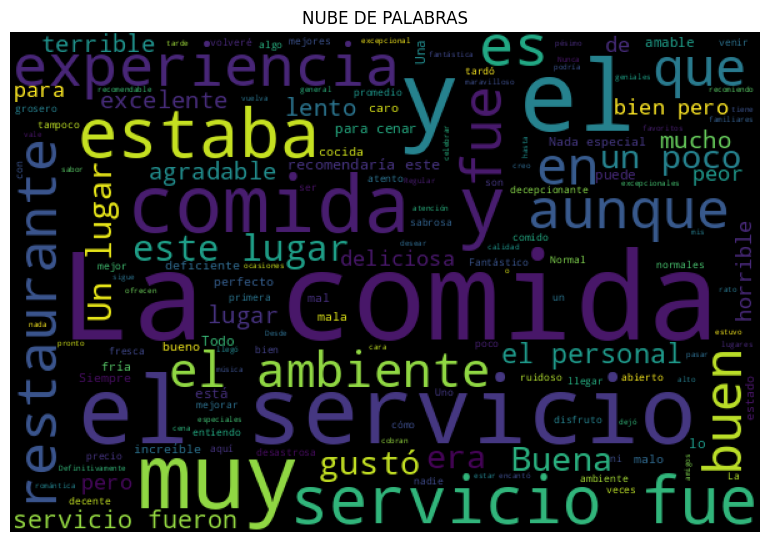

In [88]:
# Mostrar la nube de palabras
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("NUBE DE PALABRAS")
plt.savefig('NubePalabras.png')
plt.show()